<i>STATUS: Draft<i>

In [1]:
import numpy as np
import sympy as sp
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
from IPython.display import Image
from IPython.display import YouTubeVideo
import sys


In the last notebook, we explored overlap sets and subsamplings. Let's start by putting in our functions, and let's start to think more about the structure of these functions. I am just creating them as I go. But my visualisation is so we will clean this up. 

So so far we mechanisms to create a single SDR, and we have a function to randomly flip some bits. For mor than 1, we have a mechanism compute a union and overlap for any two. Finally, we can create a group of functions to visualisation. At some point we are going to switch to using htm.core to manage alot of this, but these functions are handy to use

In [14]:
#################### SINGLE SDR FUNCTIONS ###################################################


def create_randomised_sdr(capacity, population):
    sdr = set()
    while len(sdr) < population:
        sdr.add(np.random.randint(low=1, high=capacity))

    return(list(sdr))


def randomly_flip_percentage_of_bits(SDR, array_size, percentage_to_flip):
    to_remove = int(percentage_to_flip * len(SDR))
    randomised_SDR = np.random.shuffle(SDR)
    del SDR[0:to_remove]
    noise = create_randominsed_sdr(np.sqrt(array_size), np.sqrt(array_size), to_remove)
    sdr_with_noise = noise + SDR
    return(sdr_with_noise)


############## MULTIPLE SDR FUNCTIONS ###################################################
def compute_union_and_overlap(SDR1_on_bits, SDR2_on_bits):
    union = list(set(SDR1_on_bits).union(SDR2_on_bits))
    overlap = list(set(SDR1_on_bits).intersection(SDR2_on_bits))
    
    return({"union": union, "overlap": overlap})

def create_and_compare_sdrs_over_multiple_iterations(iterations, sdr_size, population):
    sdr_unions_for_comparison = []
    sdr_overlaps_for_comparison = []
    for x in range(iterations):
        SDR1 = create_randominsed_sdr(sdr_size, population)
        SDR2 =create_randominsed_sdr(sdr_size, population)
        sdr_comparison = compute_union_and_overlap(SDR1, SDR2)
        sdr_unions_for_comparison.append(len(sdr_comparison['union']))
        sdr_overlaps_for_comparison.append(len(sdr_comparison['overlap']))
    print("Average union: ", str(sum(sdr_unions_for_comparison) / len(sdr_unions_for_comparison)))
    print("Average overlap: ", str(sum(sdr_overlaps_for_comparison) / len(sdr_overlaps_for_comparison)))
    return({"union_comparison": sdr_unions_for_comparison, "overlap_comparison": sdr_overlaps_for_comparison})

def compute_overlap_set_cardinality(n, w0, w1, b, provide_summary = True):
    on_bit_space = sp.binomial(w0, b)
    off_bit_space = sp.binomial(n - w0, w1 - b)
    overlap_set = on_bit_space * off_bit_space
    if provide_summary:
        print("Given a capcity of", str(w0), "bits in the on-bit space, the number of ways to arrange ", str(b), "on-bits: ", on_bit_space)
        print("Given a capacity", str(n - w0), "bits in the off-bit space, the number of ways to arrange", str(w1 - b), "off-bits: ", off_bit_space)
        print("Number of SDRs that will match w0: ", overlap_set)
    return(overlap_set)

######################## VISUALISATION FUNCTIONS ############################################

def convert_sdr_to_tuple_for_visualisation(sdr):
    pass

def create_axis_for_sdr(ax, x_limit, y_limit, population, label, create_label = True):
    
    if create_label:
        label_add = np.round((population / (x_limit * y_limit)) * 100, 2)
        label = label + ' (Sparsity: {}%)'.format(label_add)
        ax.set_xlabel(label)
        
    ax.set_xticks(range(int(x_limit)))
    ax.set_yticks(range(int(y_limit)))
    [ax.xaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(x_limit))]
    [ax.yaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(y_limit))]
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(color='k', linestyle='-', linewidth=.5)
    
    return(ax)


In [15]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/8WIzIBaLXIs" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

We have seen that SDRS are highly fault tolerant and noise tolerant. We can create, store a percentage, and imagine a stream of SDRs  - imagine collecting SDRs and putting them into different buckets///over time they will collect into SDRs in each set. When we create new SDR, can compare to all sets to see if we have seen it before....andunderstand what it miht meant

There are different ways we can visualise this. For an array, we can create the following visuaalisation, first let's create a 1000 randomised SDRs

In [16]:
n = 256
w = 8
o = 4
sdr_stack = [create_randomised_sdr(capacity=n, population=w) for i in range(1000)]

We will make one of these at random a comparison SDR

In [105]:
comparison_sdr = sdr_stack[np.random.randint(1000)]

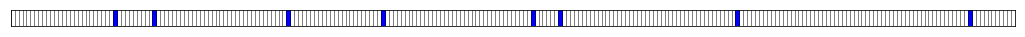

In [106]:
fig, ax1 = plt.subplots(figsize=(18, .3))
ax1 = create_axis_for_sdr(ax1, n, 1, w, "",create_label=False)
SDR1 = [ax1.add_patch(Rectangle((comparison_sdr[i], 0), 1, 1, color="blue")) for i in range(len(comparison_sdr))]

Now let's take 50 of the others we have created: 

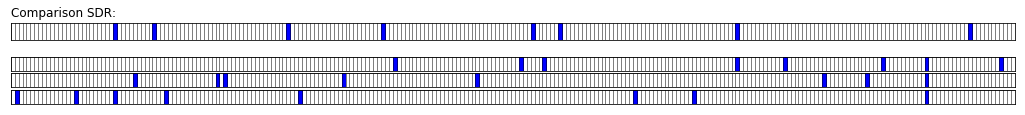

In [204]:
sdrs_to_show = 3
fig_width = (sdrs_to_show + 2) * .3


fig, ax = plt.subplots(sdrs_to_show + 2, 1, figsize=(18, fig_width))
ax[0] = plt.subplot2grid((sdrs_to_show + 1, 2), (0, 0), colspan=2)
ax[0] = create_axis_for_sdr(ax[0], n, 1, w, "",create_label=False)
SDR1 = [ax[0].add_patch(Rectangle((comparison_sdr[i], 0), 1, 1, color="blue")) for i in range(len(comparison_sdr))]


for i in range(0,sdrs_to_show):
    ax[i + 1] = plt.subplot2grid((sdrs_to_show + 2, 2), (i + 2, 0), colspan=2)
    
    
for j in range(0,sdrs_to_show):
    ax[j + 1] = create_axis_for_sdr(ax[j + 1], n, 2, w, "", create_label=False)


for k in range(0, sdrs_to_show):
    [ax[k + 1].add_patch(Rectangle((sdr_stack[k][i], 0), 1, 1, color="blue")) for i in range(len(sdr_stack[4]))]
    

t = ax[0].set_title("Comparison SDR:", loc = "left")


In [123]:
1.5/4

0.375

<div style="background:#99ddff; color:black; padding: 10px">
<b>Add to these notes:</b>
    
What becomes apparent after doing is that it needs more rigor around the code. Ideally I want to pass in size SDR get specs, get overlap and union, set a threshold. It makes more sense to have and SDR class in python which can then have attributes
</div>

We have covered alot in this notebook

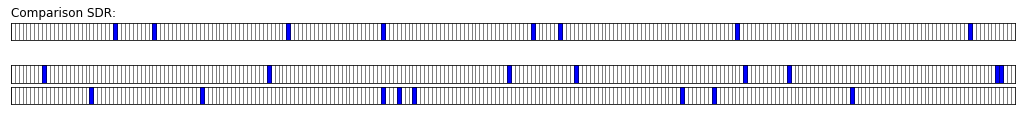

In [129]:
sdrs_to_show = 4
fig_width = sdrs_to_show * 0.375


fig, ax = plt.subplots(3, 1, figsize=(18, fig_width))
ax[0] = plt.subplot2grid((4, 2), (0, 0), colspan=2)
ax[0] = create_axis_for_sdr(ax[0], n, 1, w, "",create_label=False)


ax[1] = plt.subplot2grid((4, 2), (2, 0), colspan=2)
ax[2] = plt.subplot2grid((4, 2), (3, 0), colspan=2)


ax[1] = create_axis_for_sdr(ax[1], n, 1, w, "", create_label=False)
ax[2] = create_axis_for_sdr(ax[2], n, 1, w, "", create_label=False)

ax[0].set_title("Comparison SDR:", loc = "left")

SDR1 = [ax[0].add_patch(Rectangle((comparison_sdr[i], 0), 1, 1, color="blue")) for i in range(len(comparison_sdr))]
SDR2 = [ax[1].add_patch(Rectangle((sdr_stack[4][i], 0), 1, 1, color="blue")) for i in range(len(sdr_stack[4]))]
SDR2 = [ax[2].add_patch(Rectangle((sdr_stack[7][i], 0), 1, 1, color="blue")) for i in range(len(sdr_stack[7]))]